In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
df=pd.read_csv('insurance.csv')
filtr=df["charges"]<=12000

In [3]:
df=df.where(filtr)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 846 entries, 1 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       846 non-null    float64
 1   sex       846 non-null    object 
 2   bmi       846 non-null    float64
 3   children  846 non-null    float64
 4   smoker    846 non-null    object 
 5   region    846 non-null    object 
 6   charges   846 non-null    float64
dtypes: float64(4), object(3)
memory usage: 52.9+ KB


In [4]:
def smoker_swap(sample):
    if sample == "yes": 
        return 1
    else: 
        return 0

In [5]:
df["smoker"]=df["smoker"].apply(smoker_swap)


In [6]:
def sex_swap(sample):
    if sample == "male":
        return 1
    else: 
        return 0

In [7]:
df["sex"]=df["sex"].apply(sex_swap)

In [8]:
dfs=df[df["smoker"]==1]
dfs.sort_values(by="charges")
# Na wysokość składki palenie zaczyna mieć wpływ dopiero od 12829 $

,age,sex,bmi,children,smoker,region,charges


In [9]:
df2=pd.get_dummies(df["region"])

In [10]:
df=df.join(df2)

In [11]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'northeast', 'northwest', 'southeast', 'southwest'],
      dtype='object')

In [12]:
df=df[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 
       'northeast', 'northwest', 'southeast', 'southwest','charges']]

In [13]:
df_cor= df[['age', 'sex', 'bmi', 'children', 'smoker',
       'northeast', 'northwest', 'southeast', 'southwest','charges']]

In [14]:
df_cor.head()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest,charges
1,18.0,1,33.77,1.0,0,0,0,1,0,1725.5523
2,28.0,1,33.00,3.0,0,0,0,1,0,4449.4620
4,32.0,1,28.88,0.0,0,0,1,0,0,3866.8552
5,31.0,0,25.74,0.0,0,0,0,1,0,3756.6216
6,46.0,0,33.44,1.0,0,0,0,1,0,8240.5896


In [15]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'northeast',
       'northwest', 'southeast', 'southwest', 'charges'],
      dtype='object')

In [16]:
df_cor['charges'].corr(df_cor["sex"])


-0.04056942148614663

In [17]:

x= df_cor[["age","sex","bmi","children","smoker"]]
y=df_cor["charges"]

In [18]:
print(y)

1        1725.5523
2        4449.4620
4        3866.8552
5        3756.6216
6        8240.5896
           ...    
1332    11411.6850
1333    10600.5483
1334     2205.9808
1335     1629.8335
1336     2007.9450
Name: charges, Length: 846, dtype: float64


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["charges","region"]), y, test_size=0.3,random_state=1)

In [21]:
cor_df= X_train.copy()
cor_df["charges"]=y_train.values

In [22]:
cor_df.head()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest,charges
564,18.0,0,32.12,2.0,0,0,0,1,0,2801.2588
72,53.0,0,28.10,3.0,0,0,0,0,1,11741.7260
147,51.0,0,37.73,1.0,0,0,0,1,0,9877.6077
685,53.0,1,26.41,2.0,0,1,0,0,0,11244.3769
567,41.0,1,30.59,2.0,0,0,1,0,0,7256.7231


In [23]:
cor= cor_df.corr()
cor

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest,charges
age,1.000000,0.003876,0.116821,0.077726,NaN,-0.026740,-0.019897,-0.045463,0.089518,0.961944
sex,0.003876,1.000000,-0.012519,0.104961,NaN,0.036609,-0.018697,-0.028652,0.011094,-0.043006
bmi,0.116821,-0.012519,1.000000,0.016056,NaN,-0.166488,-0.103396,0.283534,-0.019623,0.104974
children,0.077726,0.104961,0.016056,1.000000,NaN,0.001637,0.004572,-0.053095,0.046244,0.234364
smoker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
northeast,-0.026740,0.036609,-0.166488,0.001637,NaN,1.000000,-0.312631,-0.325660,-0.337248,0.025884
northwest,-0.019897,-0.018697,-0.103396,0.004572,NaN,-0.312631,1.000000,-0.328706,-0.340402,0.003805
southeast,-0.045463,-0.028652,0.283534,-0.053095,NaN,-0.325660,-0.328706,1.000000,-0.354588,-0.089440
southwest,0.089518,0.011094,-0.019623,0.046244,NaN,-0.337248,-0.340402,-0.354588,1.000000,0.059481
charges,0.961944,-0.043006,0.104974,0.234364,NaN,0.025884,0.003805,-0.089440,0.059481,1.000000


In [24]:
import seaborn as sns 

<AxesSubplot:>

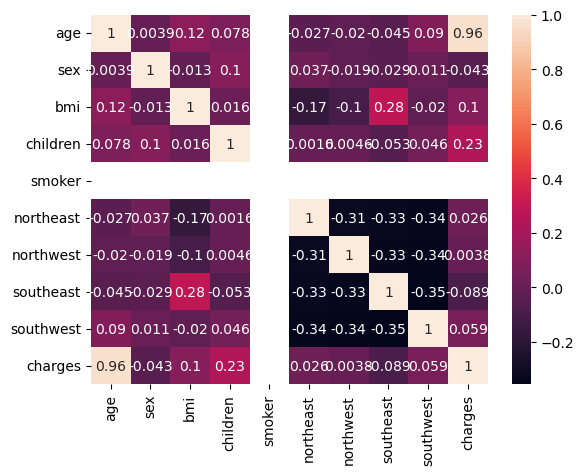

In [25]:
sns.heatmap(cor,annot=True)

<AxesSubplot:>

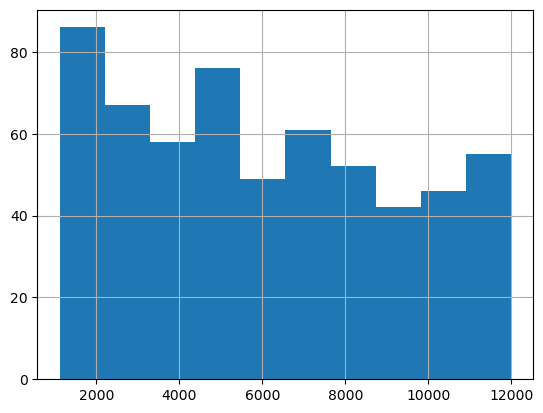

In [26]:
cor_df["charges"].hist()

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
model= LinearRegression()
model.fit(X=X_train, y= y_train)


LinearRegression()

In [29]:
pred_train= model.predict(X_train)
pred_test = model.predict(X_test)

In [30]:
import matplotlib.pyplot as plt 

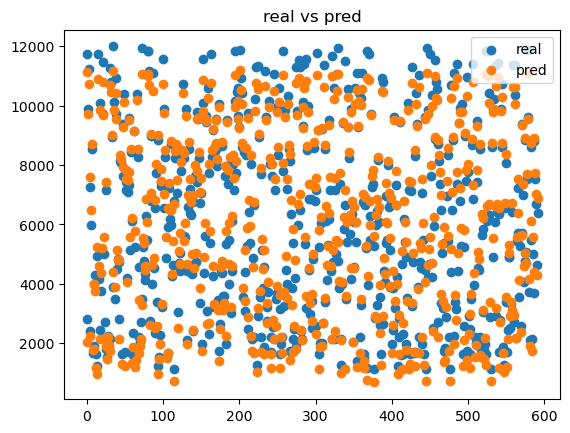

In [31]:
x_range= list(range(len (pred_train)))
plt.scatter(x_range,y_train)
plt.scatter(x_range,pred_train)
plt.title("real vs pred")
plt.legend(["real","pred"])

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
print(mean_squared_error(y_train, pred_train,squared=False))

639.9637492118713


In [34]:
x_predict=model.predict(X_test)
x_predict.shape

(254,)

In [35]:
#from sklearn.metrics import confusion_matrix
#confusion_matrix(y_test, x_predict)

In [36]:
# ograniczyc wartosci do 20000, wybór cech, funkcja wizualizacja i blad, 

In [37]:
df_higher=pd.read_csv("insurance.csv")
df_higher1=df_higher["charges"]>=16000
df_higher2=df_higher["charges"]<=30000
df_higher= df_higher[df_higher1 & df_higher2]


In [38]:
df_higher["sex"]=df_higher["sex"].apply(sex_swap)
df_higher["smoker"]=df_higher["smoker"].apply(smoker_swap)
df_higher2=pd.get_dummies(df_higher["region"])
df_higher2.head()
df_higher=df_higher.join(df_higher2)
df_higher.head()


,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,0,1
3,33,1,22.705,0,0,northwest,21984.47061,0,1,0,0
9,60,0,25.840,0,0,northwest,28923.13692,0,1,0,0
11,62,0,26.290,0,1,southeast,27808.72510,0,0,1,0
45,55,1,37.300,0,0,southwest,20630.28351,0,0,0,1


In [39]:
df_h_cor= df_higher[['age', 'sex', 'bmi', 'children', 'smoker',
       'northeast', 'northwest', 'southeast', 'southwest','charges']]
df_h_cor.head()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest,charges
0,19,0,27.900,0,1,0,0,0,1,16884.92400
3,33,1,22.705,0,0,0,1,0,0,21984.47061
9,60,0,25.840,0,0,0,1,0,0,28923.13692
11,62,0,26.290,0,1,0,0,1,0,27808.72510
45,55,1,37.300,0,0,0,0,0,1,20630.28351


In [40]:
A= df_h_cor[["age","sex","bmi","children","smoker"]]
b=df_h_cor["charges"]

In [41]:
A_train, A_test, b_train, b_test = train_test_split(df_h_cor.drop(columns=["charges"]), b, test_size=0.3,random_state=1)

In [42]:
cor_df2= A_train.copy()
cor_df2["charges"]=b_train.values

In [43]:
cor2= cor_df2.corr()
cor2

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest,charges
age,1.000000,-0.082094,0.123806,-0.034672,-0.051499,0.047599,-0.067297,0.100876,-0.099909,0.590672
sex,-0.082094,1.000000,0.010535,-0.010916,0.130001,-0.055556,-0.043387,-0.036464,0.160329,-0.123604
bmi,0.123806,0.010535,1.000000,-0.035316,-0.526215,0.012082,-0.095596,0.107207,-0.032379,0.047900
children,-0.034672,-0.010916,-0.035316,1.000000,-0.044189,-0.006393,-0.041072,-0.111194,0.188851,-0.119308
smoker,-0.051499,0.130001,-0.526215,-0.044189,1.000000,-0.033389,0.032603,-0.089963,0.110088,-0.124176
northeast,0.047599,-0.055556,0.012082,-0.006393,-0.033389,1.000000,-0.368682,-0.398876,-0.284981,0.001385
northwest,-0.067297,-0.043387,-0.095596,-0.041072,0.032603,-0.368682,1.000000,-0.375816,-0.268506,0.091920
southeast,0.100876,-0.036464,0.107207,-0.111194,-0.089963,-0.398876,-0.375816,1.000000,-0.290495,-0.040885
southwest,-0.099909,0.160329,-0.032379,0.188851,0.110088,-0.284981,-0.268506,-0.290495,1.000000,-0.059102
charges,0.590672,-0.123604,0.047900,-0.119308,-0.124176,0.001385,0.091920,-0.040885,-0.059102,1.000000


<AxesSubplot:>

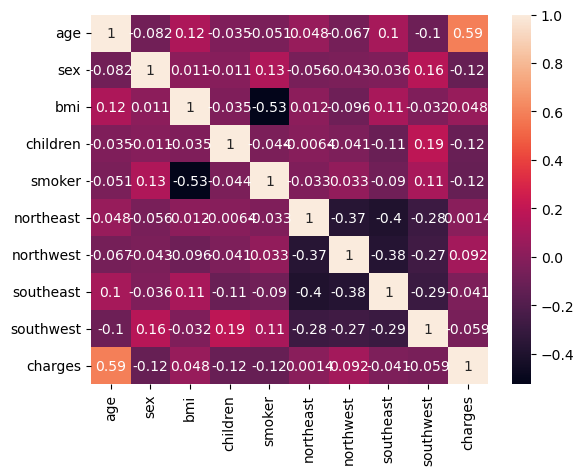

In [44]:
sns.heatmap(cor2,annot=True)

<AxesSubplot:>

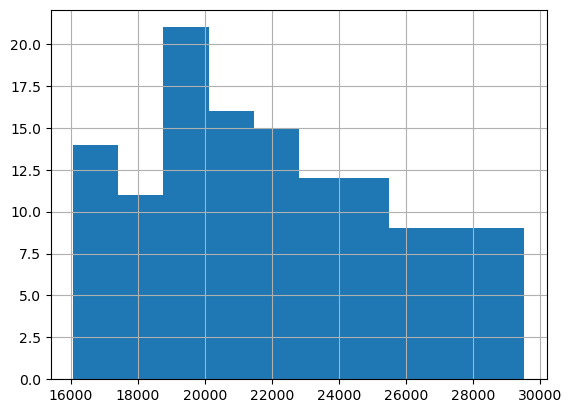

In [45]:
cor_df2["charges"].hist()

In [46]:
model2= LinearRegression()
model2.fit(X=A_train, y= b_train)

LinearRegression()

In [47]:
pred_train2= model2.predict(A_train)
pred_test2 = model2.predict(A_test)

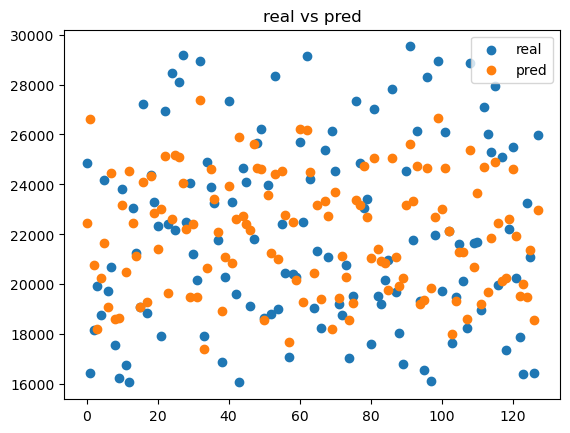

In [48]:
a_range= list(range(len (pred_train2)))
plt.scatter(a_range,b_train)
plt.scatter(a_range,pred_train2)
plt.title("real vs pred")
plt.legend(["real","pred"])

In [49]:
print(mean_squared_error(b_train, pred_train2,squared=False))

2838.239428124848


mse:8097510.41097873,
rmse:2845.6124843306984,
r2_score:0.37282485598089565


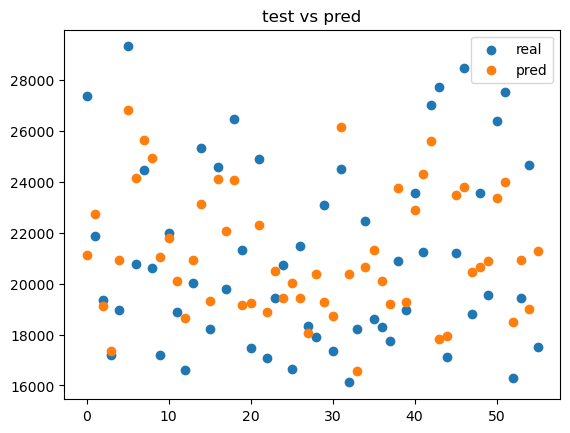

In [50]:
def reggresion_results(y_real,y_pred,title):
    plt.figure()
    data_range= list(range(len (y_real)))
    plt.scatter(data_range,y_real)
    plt.scatter(data_range,y_pred)
    plt.title(title)
    plt.legend(["real","pred"])
    
    mse = mean_squared_error(y_real, y_pred,squared=True)                
    rmse = mean_squared_error(y_real, y_pred,squared=False)      
    r2_scored= r2_score(y_real, y_pred)                
    print(f"mse:{mse},\nrmse:{rmse},\nr2_score:{r2_scored}")
reggresion_results(b_test, pred_test2, "test vs pred")                     